In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import os
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import matplotlib.pyplot as plt

In [2]:
LOCAL_DATA_PATH = '../../data/SPY_5y_daily.csv'

In [ ]:
def load_data():
    if os.path.exists(LOCAL_DATA_PATH):
        print(f"Veri Bulundu -> {LOCAL_DATA_PATH}")
        df = pd.read_csv(LOCAL_DATA_PATH, index_col=0, parse_dates=True, header=[0, 1])
    else:
        print(f"Veri Bulunamadi -> {LOCAL_DATA_PATH}")
        df = yf.download('SPY', period='5y', interval='1d', progress=False)
    return df

In [ ]:
spy = load_data()

Veri Bulundu -> ../../data/SPY_5y_daily.csv


In [6]:
spy.head()

Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2021-01-19,353.460846,354.002278,351.687246,353.171471,51233300
2021-01-20,358.352234,359.192357,355.365098,355.757142,61836100
2021-01-21,358.678955,359.341744,357.754823,358.912324,47840100
2021-01-22,357.409393,358.576239,356.438570,356.821299,52860500
2021-01-25,358.819000,359.173697,353.283464,358.146896,70402000


In [14]:
spy.columns = spy.columns.droplevel(1)

In [15]:
spy.head()

Price,Close,High,Low,Open,Volume
Date,,,,,
2021-01-19,353.460846,354.002278,351.687246,353.171471,51233300
2021-01-20,358.352234,359.192357,355.365098,355.757142,61836100
2021-01-21,358.678955,359.341744,357.754823,358.912324,47840100
2021-01-22,357.409393,358.576239,356.438570,356.821299,52860500
2021-01-25,358.819000,359.173697,353.283464,358.146896,70402000


In [17]:
spy.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [18]:
spy['Return'] = spy['Close'].pct_change()

In [21]:
spy.head(3)

Price,Close,High,Low,Open,Volume,Return
Date,,,,,,
2021-01-19,353.460846,354.002278,351.687246,353.171471,51233300,NaN
2021-01-20,358.352234,359.192357,355.365098,355.757142,61836100,0.013839
2021-01-21,358.678955,359.341744,357.754823,358.912324,47840100,0.000912


In [24]:
data = spy[["Return"]].copy()
data.head()

Price,Return
Date,
2021-01-19,NaN
2021-01-20,0.013839
2021-01-21,0.000912
2021-01-22,-0.003540
2021-01-25,0.003944


In [25]:
type(data)

pandas.core.frame.DataFrame

In [30]:
data['Lag_1'] = data['Return'].shift(1)
data = data.dropna()
data.head(3)

Price,Return,Lag_1
Date,,
2021-01-21,0.000912,0.013839
2021-01-22,-0.003540,0.000912
2021-01-25,0.003944,-0.003540


In [31]:
data.head(3)

Price,Return,Lag_1
Date,,
2021-01-21,0.000912,0.013839
2021-01-22,-0.003540,0.000912
2021-01-25,0.003944,-0.003540


In [32]:
Y = data['Return']
X = sm.add_constant(data['Lag_1'])
model = sm.OLS(Y, X).fit()
residuals = model.resid

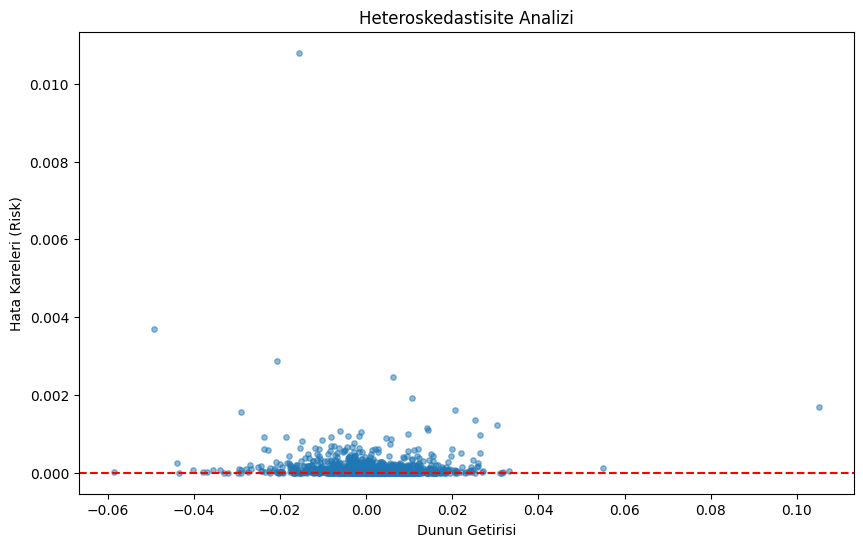

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Lag_1'], residuals**2, alpha=0.5, s=15)
plt.title("Heteroskedastisite Analizi")
plt.xlabel("Dunun Getirisi")
plt.ylabel("Hata Kareleri (Risk)")
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [34]:
bp_test = smd.het_breuschpagan(residuals, model.model.exog)
print(bp_test)

(np.float64(3.8756238271779244), np.float64(0.04899209993224052), np.float64(3.8814386185171306), np.float64(0.049042804025320214))


In [37]:
if bp_test[1] < 0.05:
    print("HeteroSkotastike var")
else:
    print("varyans sabit heteroskodastike yok")


HeteroSkotastike var


In [38]:
white_test = smd.het_white(residuals, model.model.exog)

In [39]:
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
white_results = dict(zip(labels, white_test))

In [43]:
for name, value in white_results.items():
    print(f"{name:<15} | {value:<15.6f}") 

LM Statistic    | 45.911822      
LM-Test p-value | 0.000000       
F-Statistic     | 23.771315      
F-Test p-value  | 0.000000       


In [ ]:
if white_test[1] < 0.05:
    print("Heteroskedastisite var")
else:
    print("Heteroskedastisite yok")

Heteroskodastide var


In [46]:
model_2 = sm.OLS(Y, X).fit(cov_type='HC3')

In [49]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.314
Date:                Sun, 18 Jan 2026   Prob (F-statistic):              0.252
Time:                        12:10:17   Log-Likelihood:                 3904.8
No. Observations:                1254   AIC:                            -7806.
Df Residuals:                    1252   BIC:                            -7795.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.977      0.0

In [50]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                    0.4130
Date:                Sun, 18 Jan 2026   Prob (F-statistic):              0.521
Time:                        12:10:25   Log-Likelihood:                 3904.8
No. Observations:                1254   AIC:                            -7806.
Df Residuals:                    1252   BIC:                            -7795.
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.947      0.0

In [53]:
print(model.summary().tables[1])
print(model_2.summary().tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.977      0.048     4.5e-06       0.001
Lag_1         -0.0324      0.028     -1.146      0.252      -0.088       0.023
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.947      0.051   -3.91e-06       0.001
Lag_1         -0.0324      0.050     -0.643      0.520      -0.131       0.066
